In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../datasets/Test1.csv")
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
data['date_time'] = pd.to_datetime(data['date_time'] , format="%d-%m-%Y %H:%M")

In [5]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


<function matplotlib.pyplot.show(close=None, block=None)>

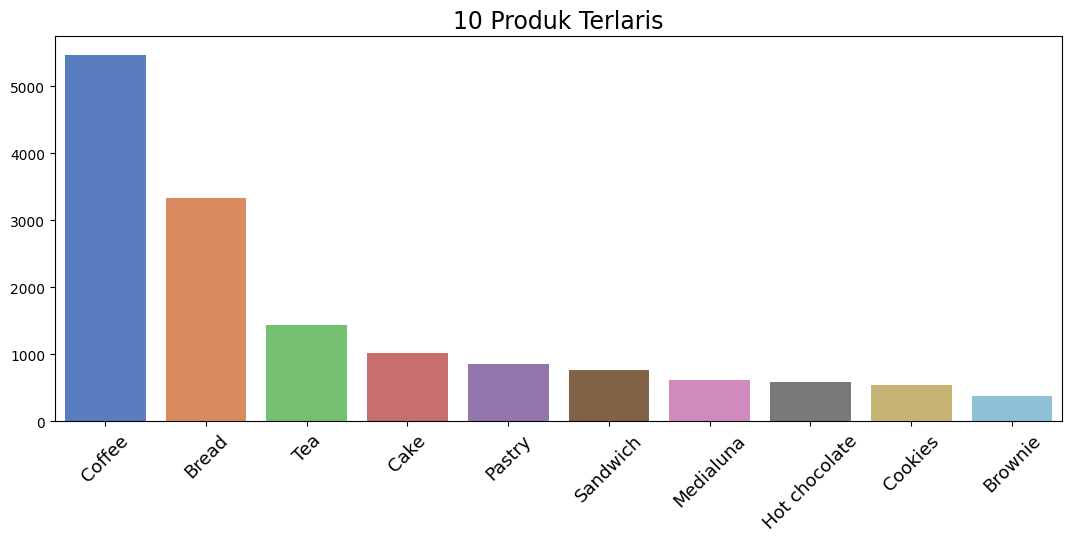

In [6]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index,
            y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Produk Terlaris', size = 17)
plt.show

Text(0.5, 1.0, 'Jumlah Transaksi Tiap Bulan dari Oktober - April')

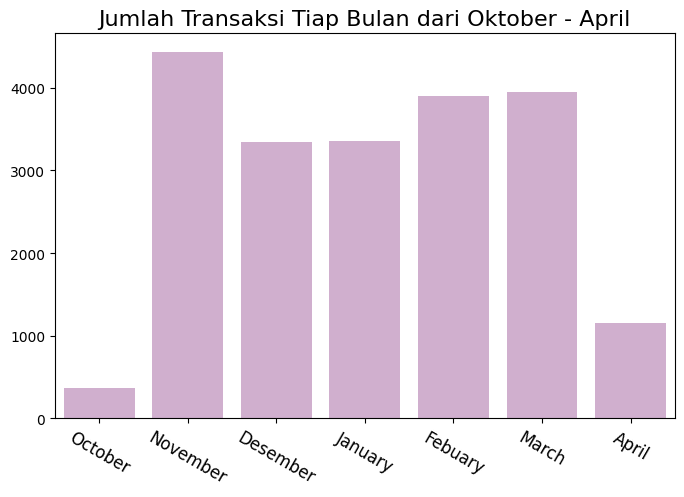

In [7]:
data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["October", "November", "Desember" , "January" , "Febuary" , "March", "April"],
    y = data_perbulan.values, color="#D5AAD3")
plt.xticks(size = 12 , rotation = -30)
plt.title("Jumlah Transaksi Tiap Bulan dari Oktober - April", size =16)


Text(0.5, 1.0, 'Jumlah Transaksi Tiap Bulan dari Oktober - April')

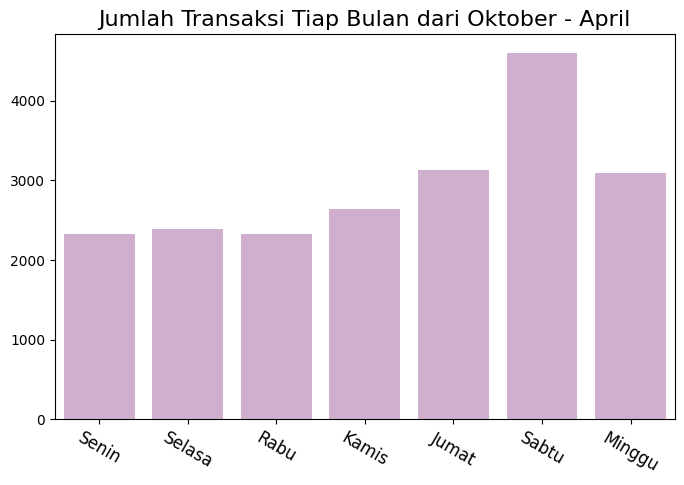

In [8]:
data_perhari = data.groupby('day')['Transaction'].count()


plt.figure(figsize=(8,5))
sns.barplot(
    x = ["Senin","Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"],
    y = data_perhari.values, color="#D5AAD3")
plt.xticks(size = 12 , rotation = -30)
plt.title("Jumlah Transaksi Tiap Bulan dari Oktober - April", size =16)

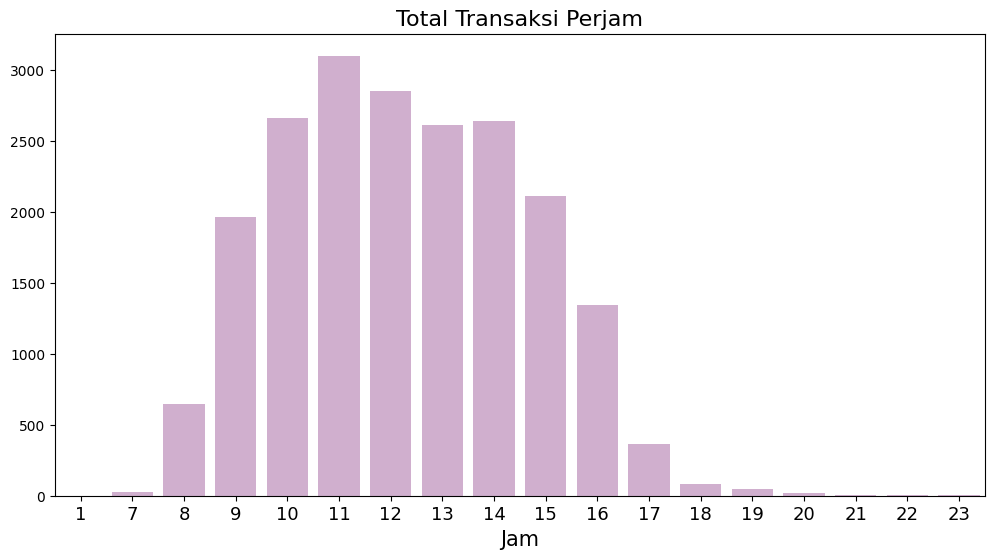

In [9]:
data_jam = data.groupby('hour')['Transaction'].count()

plt.figure(figsize=(12,6))
sns.barplot(
    x =  data_jam.index,
    y = data_jam.values, color="#D5AAD3")
plt.xlabel('Jam', size =15)
plt.xticks(size = 13)
plt.title("Total Transaksi Perjam", size =16)
plt.show()

In [10]:
# Masuk ke modeling data / data preparation
data["Item"] = data["Item"].apply(lambda item: item.lower())
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [11]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [12]:
from mlxtend.frequent_patterns import association_rules, apriori

In [13]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")

In [14]:
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [15]:
item_count_pivot = item_count.pivot_table(index='Transaction' , columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Data Set : ",item_count_pivot.shape)
item_count_pivot.head()

Ukuran Data Set :  (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def encode(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print("Ukuran dataset : ", item_count_pivot.shape)
print("Jumlah Transaksi : ", item_count_pivot.shape[0])
print("Jumlah items : ", item_count_pivot.shape[1])

Ukuran dataset :  (9465, 94)
Jumlah Transaksi :  9465
Jumlah items :  94


In [24]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support= support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets


In [20]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head(100)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
29,(spanish brunch),(coffee),0.010882,0.598837,1.251766
19,(medialuna),(coffee),0.035182,0.569231,1.189878
22,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
17,(juice),(coffee),0.020602,0.534247,1.116750
24,(sandwich),(coffee),0.038246,0.532353,1.112792
7,(cake),(coffee),0.054728,0.526958,1.101515
26,(scone),(coffee),0.018067,0.522936,1.093107
13,(cookies),(coffee),0.028209,0.518447,1.083723


In [21]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count_pivot = item_count.pivot_table(index='Transaction' , columns='Item', values='Count', aggfunc='sum').fillna(0)

def encode(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1

item_count_pivot = item_count_pivot.applymap(encode)
